In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls '/content/drive/My Drive/Eventlog/'


ls: cannot access '/content/drive/My Drive/Eventlog/': No such file or directory


In [4]:
!pip install pm4py

In [0]:
#Importing library to read log file
from pm4py.objects.log.importer.xes import factory as xes_import_factory

import pandas as pd


## loading xes file and reading the file

In [0]:
#File path
filename = '/content/drive/My Drive/Eventlog/Examplebadjulian.xes'
log = xes_import_factory.apply(filename)

## converting xes to csv and reading the file using pandas

In [0]:
from pm4py.objects.log.exporter.csv import factory as csv_exporter

filename = "/content/drive/My Drive/Eventlog/Example_xes_csv.csv"

csv_exporter.export(log, filename )

In [0]:
filename =  "/content/drive/My Drive/Eventlog/Example_xes_csv.csv"
df = pd.read_csv(filename)

In [9]:
df.head()

case:concept:name  ...             time:timestamp
0                 88  ...  2013-03-17 17:56:00-05:00
1                 88  ...  2013-03-18 17:56:00-05:00
2                 88  ...  2013-03-19 17:56:00-05:00
3                 88  ...  2013-03-20 17:56:00-05:00
4                 88  ...  2013-03-21 17:56:00-05:00

[5 rows x 4 columns]

## Function to convert single event to combined event

In [0]:
def modify_data(df_eve,unique_id):
  
  case_id = []
  activity_id = []
  complete_time_stamp = []
  lifecycle_transition = []

  for i in range(1,len(unique_id)+1):
  
    row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
    row_filter  = row_filter.reset_index(drop=True)
  
    for n in range(len(row_filter)):
      case_id.append(row_filter.loc[row_filter['case:concept:name']==i,'case:concept:name'][n])
    
    case_id.append(row_filter.loc[row_filter['case:concept:name']==i,'case:concept:name'][n])
  
  
  
  for i in range(1,len(unique_id)+1):
  
    row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
    row_filter  = row_filter.reset_index(drop=True)
    
    for n in range(len(row_filter)):
      complete_time_stamp.append(row_filter.loc[row_filter['case:concept:name']==i,'time:timestamp'][n])
    
    complete_time_stamp.append(row_filter.loc[row_filter['case:concept:name']==i,'time:timestamp'][n])
    
    
  for i in range(1,len(unique_id)+1):
  
    row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
    row_filter  = row_filter.reset_index(drop=True)
    
    for n in range(len(row_filter)):
      lifecycle_transition .append(row_filter.loc[row_filter['case:concept:name']==i,'lifecycle:transition'][n])
    
    lifecycle_transition.append(row_filter.loc[row_filter['case:concept:name']==i,'lifecycle:transition'][n])
    
  
  for i in range(1,len(unique_id)+1):
  
    row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
    row_filter  = row_filter.reset_index(drop=True)
  
    activity_id.append('start')
    for n in range(len(row_filter)-1):
      activity_id.append(row_filter.loc[row_filter['case:concept:name']==i,'concept:name'][n]+row_filter.loc[row_filter['case:concept:name']==i,'concept:name'][n+1])
    
    activity_id.append('end')
  
  
  dic_data = {'case:concept:name':case_id,'concept:name':activity_id,'lifecycle:transition':lifecycle_transition,'time:timestamp':complete_time_stamp, }
  df_modified = pd.DataFrame(dic_data)
  
  return df_modified

In [0]:
unique_id = df["case:concept:name"].unique()
modified_csv = modify_data(df,unique_id)

In [0]:
modified_csv.to_csv('/content/drive/My Drive/apps/Maryam/Eventlog//modified.csv',index=True)

# Exploring  PNML file

In [12]:
import os
from pm4py.objects.petri.importer import pnml as pnml_importer

filename = '/content/drive/My Drive/Eventlog/Examplejulianchanges.pnml'

net, initial_marking, final_marking = pnml_importer.import_net(filename)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated function import_net.
  


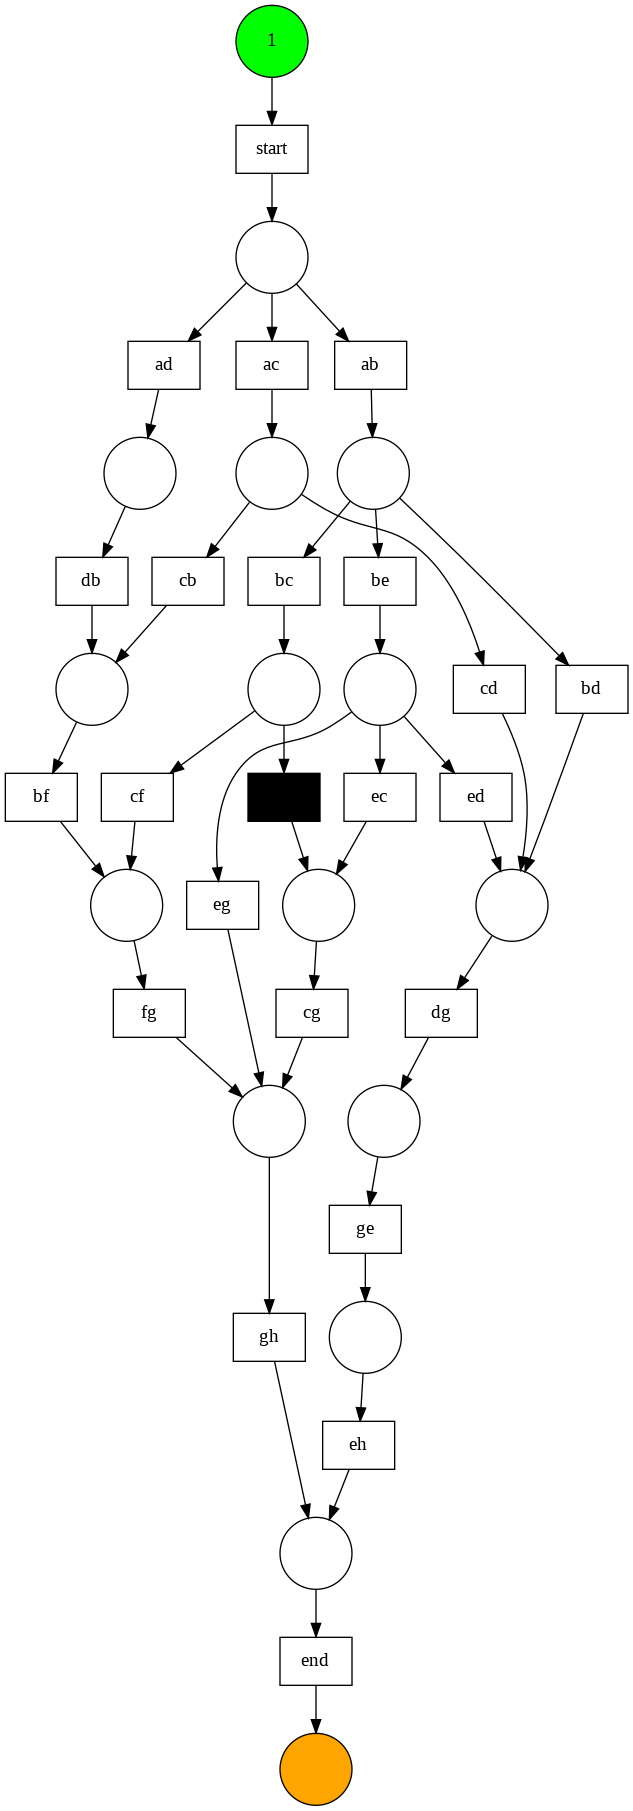

In [13]:
from pm4py.visualization.petrinet import factory as pn_vis_factory

gviz = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz)

In [0]:
from pm4py.objects.petri import semantics

transitions = semantics.enabled_transitions(net, initial_marking)

In [0]:
place = net.places
transitions = net.transitions
arc = net.arcs

## Token replay

In [0]:
# This functions gives places which goes to transitions


def trans_in(trans_inputs):
  import re
  trainsition_input = []
  place_out = []
  arc_s = str(trans_inputs)
  arc_clean = re.sub('[^A-Za-z0-9,->]+', '', arc_s)
  arc_f = arc_clean.split(",")
  
  for i in range(len(arc_f)):
    arc_f[i]=arc_f[i][1:]
    arc_f[i] = arc_f[i].split("->")
    trainsition_input.append(arc_f[i][1][1:])
    place_out.append(arc_f[i][0])
    
  return place_out,trainsition_input
  

trans_inputs = []
for place in net.places:
  
  for arc in place.out_arcs:
    trans_inputs.append(arc)
        
place_output,trans_input = trans_in(trans_inputs)

In [0]:
# This function gives transitions output which goes to places

def trans_out(trans_out):
  import re
  trainsition_output = []
  place_in = []
  arc_s = str(trans_out)
  arc_clean = re.sub('[^A-Za-z0-9,->]+', '', arc_s)
  arc_f = arc_clean.split(",")
  
  for i in range(len(arc_f)):
    arc_f[i]=arc_f[i][1:]
    arc_f[i] = arc_f[i].split("->")
    trainsition_output.append(arc_f[i][0]) 
    place_in.append(arc_f[i][1][1:])
    
  return trainsition_output,place_in 
  

transitions_out = []
for trans in transitions:
#    trans_unique_name[trans.name]= trans.label
    for arc in trans.out_arcs:
        transitions_out.append(arc)
        
trans_output, place_input = trans_out(transitions_out)

In [0]:
# firing transition 
def fire_trans(trans, place_trans, trans_place):
  
  for i in place_trans:
    place_tokens[i] = 0
    pmcr["c"] +=1

  for i in trans_place:
    place_tokens[i] = 1
    pmcr["p"] +=1

       

In [0]:
# introducing start transition and putting one token in the output place 
def start_trans(trans_output,place_input,place_output,trans_input,place_p_c):

  for t , p in enumerate(zip(trans_output,place_input,place_output,trans_input)):
    if "start"  == p[0]:
      trans_place.append(p[1])
      #produce tokens
      for i in trans_place:
        place_tokens[i] = 1
        pmcr["p"] +=1



In [0]:
# introducing End transition and producing and consuming one token in the input place to the end transition 
def end_trans(trans_output,place_input,place_output,trans_input,place_p_c):

  for t , p in enumerate(zip(trans_output,place_input,place_output,trans_input)):
    if "end"  == p[0]:
      place_before_end = place_output[trans_input.index('end')]
      place_tokens[place_before_end ] = 0
      pmcr["c"] +=1

            

In [0]:
def checking_hidden_transition(tran_obs,place_trans,trans_place):
   
  filterd_hidden_trans = []
  
  # Going back to transition to place
  trans_to_place = []
  for i in place_trans:
    for t , p in enumerate(zip(trans_output,place_input,place_output,trans_input)):
      if i  == p[1]:
        trans_to_place.append(p[0])
        
  
  
  # Filtering hidden transition
  for trans in trans_to_place:  
    if trans in hidden_trans:
      filterd_hidden_trans.append(trans)


  #If a hidden transition presents between trace, this condintion will be true
  if len(filterd_hidden_trans ) == 1:
    
    # Getting place goes to the hidden transition
    place_to_hidden_trans = []
    for t , p in enumerate(zip(trans_output,place_input,place_output,trans_input)):
      if filterd_hidden_trans[0]  == p[3]:
        place_to_hidden_trans.append(p[2])
    
    # 
    for i in place_to_hidden_trans:
      if len(place_to_hidden_trans) ==1:
        if place_tokens[i] == 0:
          pmcr["m"] +=1
          fire_trans(tran_obs ,place_trans,trans_place)
          
            # If a hidden transition is not available, this condition will be true and then put a token in the place and fire the transition
        elif place_tokens[i] == 1:
          place_tokens[i] = 0
          pmcr["c"] +=1
          pmcr["p"] +=1
          fire_trans(tran_obs ,place_trans,trans_place)  
          
              
  elif len(filterd_hidden_trans) == 0:
    pmcr["m"] +=1
    fire_trans(tran_obs ,place_trans,trans_place)




In [0]:
def trans_f(tran_obs,trans_output,place_input,place_output,trans_input,place_p_c):
  
  place_trans = []
  trans_place = []

  for t , p in enumerate(zip(trans_output,place_input,place_output,trans_input)):
    if tran_obs  == p[3]:
      place_trans.append(p[2])
      
    if tran_obs  == p[0]:
      trans_place.append(p[1])
         
     
      # Checking whether the incoming places has enough tokens or not
      # When a transitions has more than one incoming place, we have to check whether the incoming places has enough tokens or not
      # So we check token availability in each place one by one by for loop.
  for i in place_trans:
    # only If we have one incoming place to the transitions, this condition will be success.
    if len(place_trans) ==1:
      # If that place doesnt have a token, this condition will be true
      if place_tokens[i] == 0:
        checking_hidden_transition(tran_obs,place_trans,trans_place)
      
      # If a token is available in the place, this condition will be true.  
      elif place_tokens[i] == 1:
 
        # Firing the transition
        fire_trans(tran_obs ,place_trans,trans_place)

In [0]:

unique_id = modified_csv['case:concept:name'].unique()
file = {} 

for r in range(1,len(unique_id)+1):
  
  
  # Store p, c , m, and r value of each place   
  trace_pcmr = {}
  # Store p ,c and m value of each place
  place_p_c = {}
  
  #empty tokens
  place_tokens = {}

  for place in net.places:
      place_tokens[place.name] = 0
      
  # Find number of hidden transition   
  hidden_trans = []
  for i in range(len(trans_output)):
    if 'n' == trans_output[i][0]:
      hidden_trans.append(trans_output[i])
  
  # initial pmcr values 
  pmcr = {"p":0,"m":0,"c":0,"r":0}
    
  row_filter = modified_csv.loc[modified_csv['case:concept:name']==r,:]
  row_filter  = row_filter.reset_index(drop=True)

  # for loop for one trace
  for n in range(len(row_filter)):
     # To store transition output to place input
      trans_place= []
      # To store place output to transition input
      place_trans = []
          
      # event
      tran_obs = row_filter.loc[row_filter['case:concept:name']==r,'concept:name'][n]
      
      if tran_obs == "start":
        start_trans(trans_output,place_input,place_output,trans_input,place_p_c)

        
      elif tran_obs == "end":
        
        end_trans(trans_output,place_input,place_output,trans_input,place_p_c)
        
      else :
        trans_f(tran_obs,trans_output,place_input,place_output,trans_input,place_p_c)

      
      
  # Calculating remaing value
  for place, value in place_tokens.items():
    
    if value > 0:
      pmcr["r"] +=value

  
  file[r]=pmcr
  




In [28]:
file[21]

{'c': 1, 'm': 1, 'p': 1, 'r': 1}

In [0]:
trace = df.loc[df.loc[:,"case:concept:name"] ==1,: ]
trace

case:concept:name  ...             time:timestamp
204                  1  ...  2012-04-03 16:55:00-05:00
205                  1  ...  2012-04-04 16:57:00-05:00
206                  1  ...  2012-04-05 16:58:00-05:00
207                  1  ...  2012-04-06 16:59:00-05:00
208                  1  ...  2012-04-07 17:55:00-05:00
209                  1  ...  2012-04-08 17:56:00-05:00

[6 rows x 4 columns]

# Computing Fitnes 

In [0]:

def fitness(file):
  
  sum_of_c = 0
  sum_of_m = 0
  sum_of_r = 0
  sum_of_p = 0
  
  trace = {}
  
  for k, v in file.items():
    if k not in trace:
      trace[k] = {'c':0,'m':0,'p':0,'r':0}
      
      for ik, iv in trace[k].items():
        if ik == 'c' :
          trace[k][ik] = file[k][ik]  
        elif ik == 'm':
          trace[k][ik] = file[k][ik]
        elif ik == 'p':
          trace[k][ik] = file[k][ik] 
        else :
          trace[k][ik] = file[k][ik]
 
  
  for k, v in trace.items():

    for ik, iv in v.items():
      if ik == 'c' :
        sum_of_c += v[ik]
      elif ik == 'm':
        sum_of_m += v[ik]
      elif ik == 'p':
        sum_of_p += v[ik]
      else :
        sum_of_r += v[ik]
        
  fitness = 1/2 * (1-sum_of_m/sum_of_c) + 1/2 *(1-sum_of_r/sum_of_p)
  
  result = '%.2f' % fitness + ' %'
        
  return result
 
  
result = fitness(file)
result

'0.94 %'

In [0]:


place_trans = []
trans_place = []
hidden_trans = ["n39"]

for t , p in enumerate(zip(trans_output,place_input,place_output,trans_input)):
  if "cg"  == p[3]:
    place_trans.append(p[2])
      
  if "cg"  == p[0]:
    trans_place.append(p[1])
    

# Going back to transition to place
t_p = []
for i in place_trans:
  for t , p in enumerate(zip(trans_output,place_input,place_output,trans_input)):
    if i  == p[1]:
      t_p.append(p[0])
      

#Checking whether he transition is hidden transition or not
for trans in t_p:
  if trans in hidden_trans:
    print(trans)
    
    # Going back to place from hidden transition
    place_hidden_trans = []
    for t , p in enumerate(zip(trans_output,place_input,place_output,trans_input)):
      if trans  == p[3]:
        place_hidden_trans.append(p[2])
        
    print(place_hidden_trans)
    
    for i in place_hidden_trans:
      if len(place_hidden_trans) ==1: 
        
        if place_tokens[i] == 0:
          
          m = place_trans[0]
          if m not in place_p_c:             
            place_p_c[m] = {}
            place_p_c[m]["m"] = 1

            # Fire the hidden transition
            fire_trans(tran_obs ,place_trans,trans_place)
          else:
            place_p_c[m]["m"] = 1

            # Firing the hidden transition
            fire_trans(tran_obs ,place_trans,trans_place)    

            # If a hidden transition is not available, this condition will be true and then put a token in the place and fire the transition
            else:

              place_tokens[i] = 1
              if i not in place_p_c:
                place_p_c[i] = {}
                place_p_c[i]["c"] = 1
                
              m = place_trans[0]
              if m not in place_p_c:             
                place_p_c[m] = {}
                place_p_c[m]["p"] = 1

                # Firing the transition
              fire_trans(tran_obs ,place_trans,trans_place)
              else:
                place_p_c[i]["c"] = 1
                place_p_c[m]["p"] = 1
                # Firing the transition
                fire_trans(tran_obs ,place_trans,trans_place)



n39
['n9']
['ec', 'n39']
[]


In [0]:
"""
def checking_hidden_transition(tran_obs,place_trans,trans_place):

  # Going back to transition to place
  t_p = []
  for i in place_trans:
    for t , p in enumerate(zip(trans_output,place_input,place_output,trans_input)):
      if i  == p[1]:
        t_p.append(p[0])


  #Checking whether he transition is hidden transition or not
  for trans in t_p:
    print(trans)
    
    if trans in hidden_trans:
      # Going back to place from hidden transition
      place_hidden_trans = []
      for t , p in enumerate(zip(trans_output,place_input,place_output,trans_input)):
        if trans  == p[3]:
          place_hidden_trans.append(p[2])
          

      for i in place_hidden_trans:
        if len(place_hidden_trans) ==1:
           

          if place_tokens[i] == 0:
            m = place_trans[0]
            if m not in place_p_c:             
              place_p_c[m] = {}
              place_p_c[m]["m"] = 1

              # Fire the hidden transition
              fire_trans(tran_obs ,place_trans,trans_place)
            else:
              place_p_c[m]["m"] = 1

              # Firing the hidden transition
              fire_trans(tran_obs ,place_trans,trans_place)    

              # If a hidden transition is not available, this condition will be true and then put a token in the place and fire the transition
          elif place_tokens[i] == 1:
            place_tokens[i] = 0
            
            if i not in place_p_c:
              place_p_c[i] = {}
              place_p_c[i]["c"] = 1

            m = place_trans[0]
            #place_tokens[m] = 1
            if m not in place_p_c:             
              place_p_c[m] = {}
              place_p_c[m]["p"] = 1

              # Firing the transition
              fire_trans(tran_obs ,place_trans,trans_place)
              
            else:
              
              place_p_c[i]["c"] = 1
              place_p_c[m]["p"] = 1
              # Firing the transition
              fire_trans(tran_obs ,place_trans,trans_place)
              
    elif trans not in hidden_trans:
      #place_tokens[trans] = 1
      m_trans = place_trans[0]
      #print(m_trans)
      if m_trans not in place_p_c:
        place_p_c[m_trans] = {}
        place_p_c[m_trans]["m"] = 1

        # Firing the transition
        fire_trans(tran_obs ,place_trans,trans_place)
      else:
        place_p_c[m_trans]["m"] = 1
        # Firing the transition
        fire_trans(tran_obs ,place_trans,trans_place)

"""

In [0]:
"""
def trans_f(tran_obs,trans_output,place_input,place_output,trans_input,place_p_c):
  
  place_trans = []
  trans_place = []

  
  for t , p in enumerate(zip(trans_output,place_input,place_output,trans_input)):
    if tran_obs  == p[3]:
      place_trans.append(p[2])
      
    if tran_obs  == p[0]:
      trans_place.append(p[1])
         
     
      # Checking whether the incoming places has enough tokens or not
      # When a transitions has more than one incoming place, we have to check whether the incoming places has enough tokens or not
      # So we check token availability in each place one by one by for loop.
  for i in place_trans:
    

    # only If we have one incoming place to the transitions, this condition will be success.
    if len(place_trans) ==1:
      # If that place doesnt have a token, this condition will be true
      if place_tokens[i] == 0:
          
        # Introducing hidden transition here
        if tran_obs  in hidden_trans:
          
          if i not in place_p_c:             
            place_p_c[i] = {}
            place_p_c[i]["c"] = 1
                
            # Fire the hidden transition
            fire_trans(tran_obs ,place_trans,trans_place)
          else:
            place_p_c[i]["c"] = 1
                
            # Firing the hidden transition
            fire_trans(tran_obs ,place_trans,trans_place)    
                
        # If a hidden transition is not available, this condition will be true and then put a token in the place and fire the transition
        else:
              
          place_tokens[i] = 1
          if i not in place_p_c:
            place_p_c[i] = {}
            place_p_c[i]["m"] = 1
                
            # Firing the transition
            fire_trans(tran_obs ,place_trans,trans_place)
          else:
            place_p_c[i]["m"] = 1
            # Firing the transition
            fire_trans(tran_obs ,place_trans,trans_place)

      # If a token is available in the place, this condition will be true.  
      elif place_tokens[i] == 1:
        place_p_c[i]["m"] = 0
            
        # Firing the transition
        fire_trans(tran_obs ,place_trans,trans_place)
        
"""